**IMPRS Summer School Sept. 2023**

# Introduction to scientific computing with Python: Fitting data with Scipy

We have talked about the Numpy and Matplotlib libraries, but there is a third library that is invaluable for Scientific Analysis: Scipy.

SciPy is a powerful open-source library for scientific computing in Python. It provides extensive numerical algorithms, including optimization, linear algebra, integration, and statistics tools that astronomy widely uses. SciPy also has data manipulation modules, which can be helpful when exploring astronomical datasets or creating figures to present research results. The Scipy documentation is an excellent place to learn about the top-level scientific functionality of Scipy.

Examples of the functionality in Scipy include:

- Integration (`scipy.integrate`)
- Optimization/Fitting (`scipy.optimize`)
- Interpolation (`scipy.interpolate`)
- Fourier Transforms (`scipy.fftpack`)
- Signal Processing (`scipy.signal`)
- Linear Algebra (`scipy.linalg`)
- Spatial data structures and algorithms (`scipy.spatial`)
- Statistics (`scipy.stats`)
- Multi-dimensional image processing (`scipy.ndimage`)

There are a number of routines in Scipy to help with fitting in [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In this notebook, we will take a look at how to fit models to data. When analyzing scientific data, fitting models to data allows us to determine the parameters of a physical system (assuming the model is correct).

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Setting the problem

Fitting a model to data is an important task in many scientific disciplines, including astronomy. We often need to analyze data by fitting models to understand and interpret observations and measurements, eventually get insights into physical processes.

### What is model fitting?

Model fitting involves finding the "_parameters_" of a mathematical model that best describes a given set of data. The model is typically a mathematical function that represents an underlying physical or statistical process. By adjusting the parameters of the model, we can find the best fit to the observed data. This adjustment is called _fitting_.

By fitting models to data, we can determine parameters such as the mass, temperature of stars, or chemical composition of planets, histories of galaxies, or understand the physical processes that give rise to observed phenomena. Model fitting is particularly important when dealing with complex and noisy data.

### Let's generate mock data

We first generate a fiducial set of noisy measurements. Let's assume the true function $f$:

$$ f: \forall x \in [0, 4] \rightarrow 2.3 \cdot \exp(-1.3 \cdot x) + 0.5,$$

We will randomly draw $N=100$ values of $x$ add Gaussian random noise on our data:

$$ \forall x \in [0, 4], y(x) = f(x) + \mathcal{N}(0, \sigma=0.2)$$

We now have a set of observations $\{x, y(x)\}$ with random uncertainties $\sigma$.

#### Your code below

1. define the python function `true_f` corresponding to our problem.
2. draw $N=100$ data points (`ytrue`)
3. and add Gaussian noise ($\sigma=0.2$) to obtain our mock measurements `y`.
4. Visualize your dataset.

💡  use `np.random.normal` to generate Gaussian random noise
`np.random.normal(mean, sigma, size=number_of_points)`

In [ ]:
# Write python code.

#### Solution

Code below the generation of the observed data and make a plot to visualize your dataset.

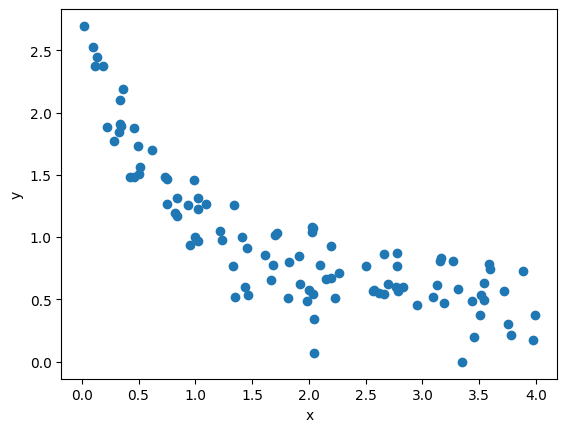

In [ ]:
def true_f(x, a=2.3, b=1.3, c=0.5):
    """ True underlying model y | x, a, b, c """
    return a * np.exp(-b * x) + c


N = 100
x = np.random.uniform(0, 4, N)
ytrue = true_f(x)
σ = 0.2 
y = ytrue + np.random.normal(0, σ, N)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y');

Let's now imagine that this is real data, and we want to determine the parameters of a model.

## Modelization

This section will model the data we just created with parametric functions that we will adjust with Scipy tools.

### Straightline

Let's first assume that our data follows a single Straighline:

$$ y = a \cdot x + b $$

In [ ]:
def line(x, a, b):
    """ Straightline model """
    return a * x + b

#### optimize.curve_fit

`optimize.curve_fit` is a very quick shortcut to first attempt to fit our model to the data. It uses non-linear least squares to fit a function, $f$ to data.
The arguments to the function should be $x$, followed by the parameters (as we defined `line` above). We can now call `curve_fit` to find the best-fit parameters using a least-squares fit:

In [ ]:
optimize.curve_fit(line, x, y)

(array([-0.41641898,  1.76917096]),
 array([[ 0.00084582, -0.0015947 ],
        [-0.0015947 ,  0.004116  ]]))

> What are these outputs?

From the online documentation, we see that the first element is the mean ("best") result and the second element is the covariance (from the local taylor approximation)

Let's inspect the results

#### Visualize the output of the fit

1. use `optimize.curve_fit` to get the fit parameters
2. plot the input data and _best fit_ model.
3. plot the residuals between the data and the model

In [ ]:
# Write python code.

#### Solution

Text(0.5, 0, 'x')

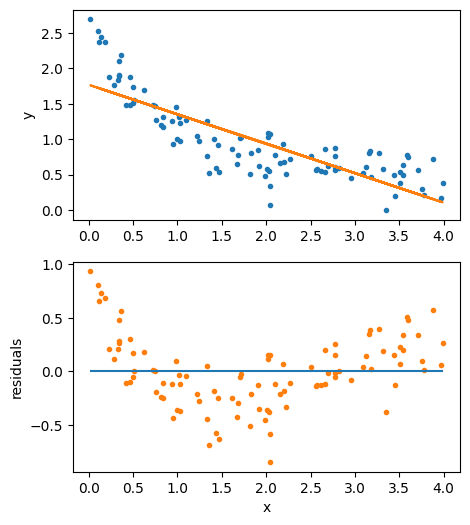

In [ ]:
par, cov = optimize.curve_fit(line, x, y)

plt.figure(figsize=(5, 6))
plt.subplot(211)
plt.plot(x, y, '.')
plt.plot(x, line(x, par[0], par[1]))
plt.ylabel('y')

plt.subplot(212)
plt.plot(x, y - line(x, par[0], par[1]), '.', color='C1')
plt.hlines([0.], x.min(), x.max(), color='C0')
plt.ylabel('residuals')
plt.xlabel('x')

#### How to include fit uncertainties?

You can use `np.random.multivariate_normal(par, cov, num_samples)`

In [ ]:
np.random.multivariate_normal(par, cov, 5)

array([[-0.40648847,  1.73567666],
       [-0.3823282 ,  1.63268445],
       [-0.38576036,  1.56868625],
       [-0.43912571,  1.75659335],
       [-0.39526412,  1.68082519]])

Update your code above to include a representation of the fitting uncertainties.

💡 you can plot multiple lines drawn from the uncertainties.

In [ ]:
# Write python code.

#### Solution

Text(0.5, 0, 'x')

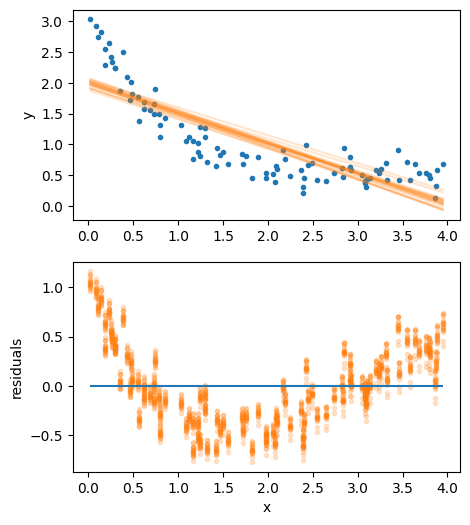

In [ ]:
Nrandom = 20
rvs = np.random.multivariate_normal(par, cov, size=Nrandom)
rvs_line = line(x[:, None], rvs[:, 0], rvs[:, 1])

plt.figure(figsize=(5, 6))
plt.subplot(211)
plt.plot(x, y, '.')
plt.plot(x, rvs_line, color='C1', alpha=0.2, rasterized=True)
plt.ylabel('y')
plt.subplot(212)
plt.plot(x, y[:, None] -  rvs_line, '.', rasterized=True, color='C1', alpha=0.2)
plt.hlines([0.], x.min(), x.max(), color='C0')
plt.ylabel('residuals')
plt.xlabel('x')

It is not surprising that our simple model does not describe our data optimally.

Now that we know how to fit a model to data and inspect the results, we can update the choice of model.

## Exercise: use a more appropriate model

We can now use the true functional form of our data: 
$$ f: \forall x \in [0, 4] \rightarrow a \cdot \exp(-b \cdot x) + c.$$

Use this form and redo the fit procedure.

#### Solution

In [ ]:
def model(x, a, b, c):
    return a * np.exp(-b * x) + c

par, cov = optimize.curve_fit(model, x, y)    
par, cov

(array([2.16002194, 1.24651167, 0.51176313]),
 array([[ 0.0082966 ,  0.00474112, -0.00014812],
        [ 0.00474112,  0.01397577,  0.00387426],
        [-0.00014812,  0.00387426,  0.00181681]]))

Text(0.5, 0, 'x')

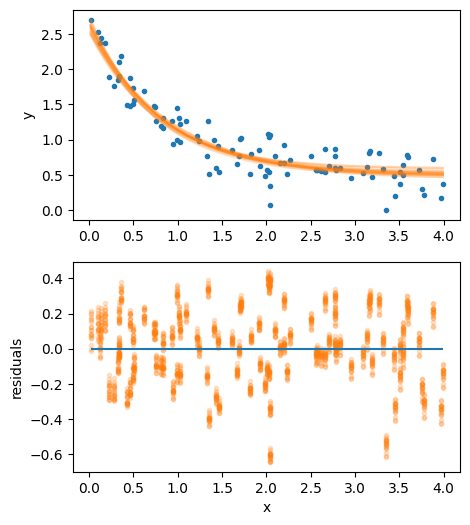

In [ ]:
Nrandom = 20
rvs = np.random.multivariate_normal(par, cov, size=Nrandom)
ind = np.argsort(x)
x = x[ind]
y = y[ind]
rvs_line = model(x[:, None], *rvs.T)


plt.figure(figsize=(5, 6))
plt.subplot(211)
plt.plot(x, y, '.')
plt.plot(x, rvs_line, color='C1', alpha=0.2, rasterized=True)
plt.ylabel('y')

plt.subplot(212)
plt.plot(x, y[:, None] -  rvs_line, '.', rasterized=True, color='C1', alpha=0.2)
plt.hlines([0.], x.min(), x.max(), color='C0')
plt.ylabel('residuals')
plt.xlabel('x')


### Pitfalls

What if we change only slightly the parametrization?

The following assumes the fit will find $b < 0$.

In [ ]:
def model_err(x, a, b, c):
    return a * np.exp(b * x) + c

/tmp/ipykernel_35/2054108922.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  rvs = np.random.multivariate_normal(par, cov, size=Nrandom)


Text(0.5, 0, 'x')

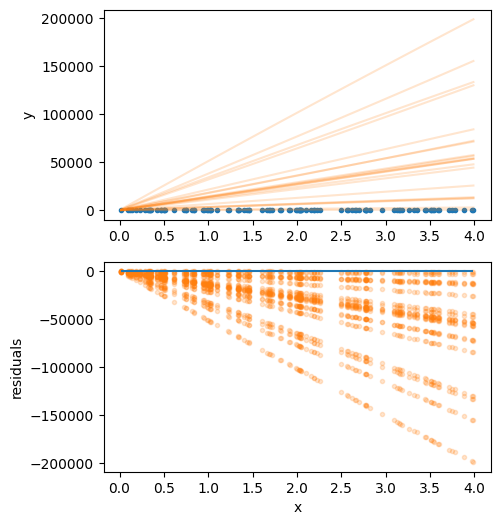

In [ ]:
par, cov = optimize.curve_fit(model_err, x, y, maxfev=2000)  
Nrandom = 20
rvs = np.random.multivariate_normal(par, cov, size=Nrandom)
ind = np.argsort(x)
x = x[ind]
y = y[ind]
rvs_line = model_err(x[:, None], *rvs.T)


plt.figure(figsize=(5, 6))
plt.subplot(211)
plt.plot(x, y, '.')
plt.plot(x, rvs_line, color='C1', alpha=0.2, rasterized=True)
plt.ylabel('y')

plt.subplot(212)
plt.plot(x, y[:, None] -  rvs_line, '.', rasterized=True, color='C1', alpha=0.2)
plt.hlines([0.], x.min(), x.max(), color='C0')
plt.ylabel('residuals')
plt.xlabel('x')

In [ ]:
# bounds : 2-tuple of array_like, optional
# Lower and upper bounds on parameters. Defaults to no bounds.

par, cov  = optimize.curve_fit(model_err, x, y,
                               bounds=[(0, -10, min(y)),
                                       (5 * max(x), 0, max(y))])
par, cov

(array([ 2.16002262, -1.24651365,  0.51176368]),
 array([[ 0.00829671, -0.00474128, -0.0001481 ],
        [-0.00474128,  0.01397598, -0.00387422],
        [-0.0001481 , -0.00387422,  0.00181677]]))

Text(0.5, 0, 'x')

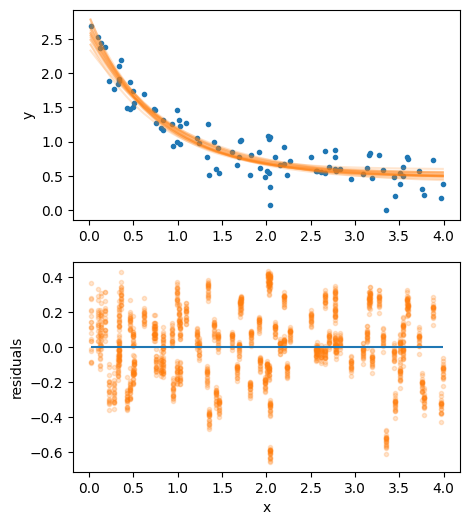

In [ ]:
Nrandom = 20
rvs = np.random.multivariate_normal(par, cov, size=Nrandom)
ind = np.argsort(x)
x = x[ind]
y = y[ind]
rvs_line = model_err(x[:, None], *rvs.T)


plt.figure(figsize=(5, 6))
plt.subplot(211)
plt.plot(x, y, '.')
plt.plot(x, rvs_line, color='C1', alpha=0.2, rasterized=True)
plt.ylabel('y')

plt.subplot(212)
plt.plot(x, y[:, None] -  rvs_line, '.', rasterized=True, color='C1', alpha=0.2)
plt.hlines([0.], x.min(), x.max(), color='C0')
plt.ylabel('residuals')
plt.xlabel('x')

## Export as python project

Let's now assume this exploration should become a python project.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30eab3f4-f7ec-46ca-bd92-ddb62a0e2aab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>